# Hand-Written Digit Classification

In this assignment you will implement multi-class classification for
hand-written digits and run a few experiments. The file ``digits-py.mat``
is a data file containing the data set, which is split into a
training set with 4000 examples, and a test set with 1000 examples.

You can import the data as a Python dictionary like this:
``` .python
data = scipy.io.loadmat('digits-py.mat')
```

The code in the cell below first does some setup and then imports the data
into the following variables for training and test data:

* ``X_train`` - 2d array shape 4000 x 400
* ``y_train`` - 1d array shape 4000
* ``X_test`` - 2d array shape 1000 x 400
* ``y_test`` - 1d array shape 1000

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

# Load train and test data
import scipy.io
data = scipy.io.loadmat('digits-py.mat')
X_train = data['X_train']
y_train = data['y_train'].ravel()
X_test  = data['X_test']
y_test  = data['y_test'].ravel()

## (2 points) Write code to visualize the data

Once you have loaded the data, it is helpful to understand how it represents images. Each row of ``X_train`` and ``X_test`` represents a 20 x 20 image as a vector of length 400 containing the pixel intensity values. To see the original image, you can reshape one row of the train or test data into a 20 x 20 matrix and then visualize it using the matlplotlib ``imshow`` command. 

Write code using ``np.reshape`` and ``plt.imshow`` to display the 100th training example as an image. (Hint: use ``cmap='gray'`` in ``plt.imshow`` to view as a grayscale image.)

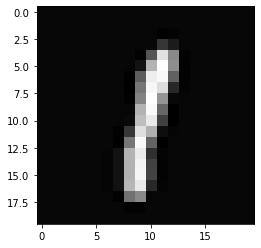

In [2]:
# Write code here
img_100 = np.reshape(X_train[99,:], (20, 20))
plt.imshow(img_100, cmap="gray")

## (2 points) Explore the data

A utility function ``display_data`` is provided for you to further visualize the data by showing a mosaic of many digits at the same time. For example, you can display the first 25 training examples like this:
``` .python
display_data( X_train[:25, :] )
```

Go ahead and do this to visualize the first 25 training examples. Then print the corresponding labels to see if they match.

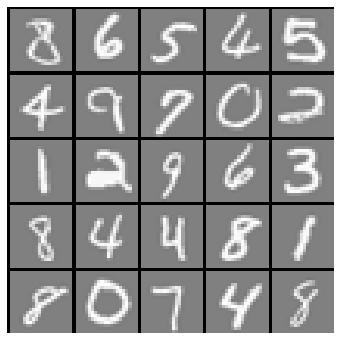

[8 6 5 4 5 4 9 7 0 2 1 2 9 6 3 8 4 4 8 1 8 0 7 4 8]


In [3]:
from one_vs_all import display_data

# Write code here
display_data(X_train[:25,:])
print(y_train[:25])

## Alert: notation change!

Please read this carefully to understand the notation used in the assignment. We will use logistic regression to solve multi-class classification. For three reasons (ease of displaying parameters as images, compatibility with scikit learn, previewing notation for SVMs and neural networks), we will change the notation as described here.

### Old notation
Previously we defined our model as
$$
h_{\boldsymbol{\theta}}(\mathbf{x}) = \text{logistic}(\theta_0 + \theta_1 x_1 + \ldots + \theta_n x_n)  = \text{logistic}(\boldsymbol{\theta}^T \mathbf{x})
$$
where 

* $\mathbf{x} = \begin{bmatrix}1, x_1, \ldots, x_n\end{bmatrix}$ was a feature vector with a 1 added in the first position
* $\boldsymbol{\theta} = \begin{bmatrix}\theta_0, \theta_1, \ldots, \theta_n\end{bmatrix}$ was a parameter vector with the intercept parameter $\theta_0$ in the first position

### New notation

We will now define our model as
$$
h_{\mathbf{w}}(\mathbf{x}) = \text{logistic}(b + w_1 x_1 + \ldots + w_n x_n)  = \text{logistic}(\mathbf{w}^T \mathbf{x} + b)
$$
where 

* $\mathbf{x} \in \mathbb{R}^n$ is the **original feature vector** with no 1 added
* $\mathbf{w} \in \mathbb{R}^n$ is a **weight vector** (equivalent to $\theta_1, \ldots, \theta_n$ in the old notation)
* $b$ is a scalar **intercept parameter** (equivalent to $\theta_0$ in our old notation)

## (10 points) One-vs-All Logistic Regression

Now you will implement one vs. all multi-class classification using logistic regression. Recall the method presented in class. Suppose we are solving a $K$ class problem given training examples in the data matrix $X \in \mathbb{R}^{m \times n}$ and label vector
$\mathbf{y} \in \mathbb{R}^{m}$ (the entries of $\mathbf{y}$ can be from $1$ to
$K$). 

**For each class $c = 1,\ldots,K$**, fit a logistic regression model
to distinguish class $c$ from the others using the
labels

$$
y_c^{(i)} = 
\begin{cases}
1 & \text{if } y^{(i)} = c \\
0 & \text{otherwise}.
\end{cases}
$$

This training
procedure  will result in a weight vector $\mathbf{w}_c$ and an intercept parameter $b_c$
that can be used to predict the probability that a new example $\mathbf{x}$ belongs to class $c$:

$$
\text{logistic}(\mathbf{w}_c^T \mathbf{x} + b_c) = \text{probability that $\mathbf{x}$
  belongs to class $c$}.
$$

The overall training procedure will yield one weight vector for each
class. To make the final prediction for a new example, select the
class with highest predicted probability:

$$
\text{predicted class} = \text{the value of $c$ that maximizes } \text{logistic}(\mathbf{w}_c^T \mathbf{x} + b_c).
$$

### Training ###

Open the file ``one_vs_all.py`` and complete the function ``train_one_vs_all`` 
to train binary classifiers using the procedure outlined 
above. I have included a function for training a regularized logistic regression 
model, which you can call like this:

``` .python
weight_vector, intercept = fit_logistic_regression(X, y, lambda_val)
```

Follow the instructions in the file for more details. Once you are done, test your implementation by running the code below to train the model and display the weight 
vectors as images. You should see images that are recognizable as the digits 0 through 9 (some are only vague impressions of the digit).

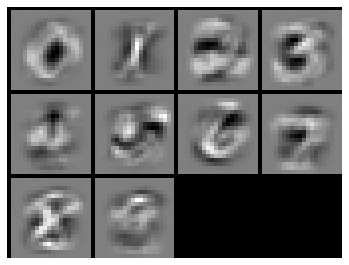

In [14]:
from one_vs_all import train_one_vs_all

lambda_val = 100
weight_vectors, intercepts = train_one_vs_all(X_train, y_train, 10, lambda_val)
display_data(weight_vectors) # display weight vectors as images

### Predictions

Now complete the function ``predict_one_vs_all`` in ``one_vs_all.py`` and run the code below to make predictions on the train and test sets. You should see accuracy around 88% on the test set.

In [5]:
from one_vs_all import predict_one_vs_all

pred_train = predict_one_vs_all(X_train, weight_vectors, intercepts)
pred_test  = predict_one_vs_all(X_test,  weight_vectors, intercepts)

print("Training Set Accuracy: %f" % (np.mean(pred_train == y_train) * 100))
print("    Test Set Accuracy: %f" % (np.mean( pred_test == y_test) * 100))

Training Set Accuracy: 89.275000
    Test Set Accuracy: 88.300000


## (5 points) Regularization Experiment

Now you will experiment with different values of the regularization 
parameter $\lambda$ to control overfitting. Write code to measure the training 
and test accuracy for values of $\lambda$ that are powers of 10 ranging from 
$10^{-3}$ to $10^5$.

* Display the weight vectors for each value of $\lambda$ as an image using the ``display_data`` function
* Save the training and test accuracy for each value of $\lambda$
* Plot training and test accuracy versus lambda (in one plot). 

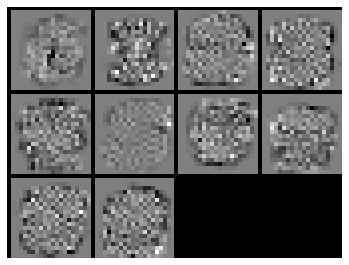

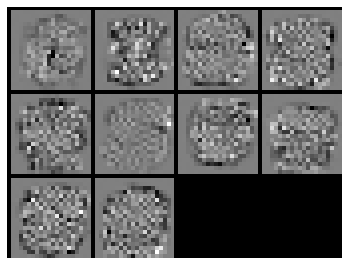

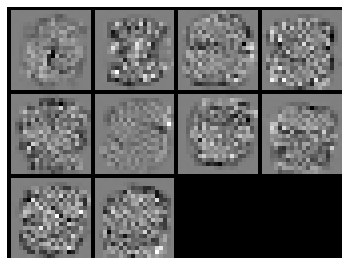

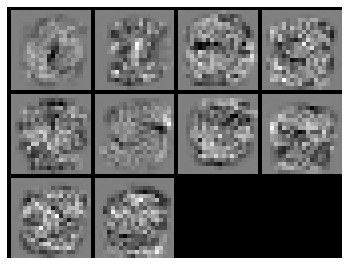

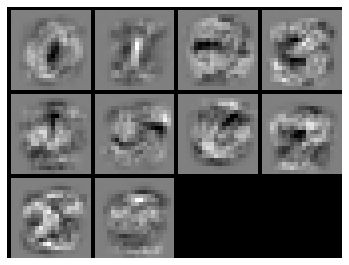

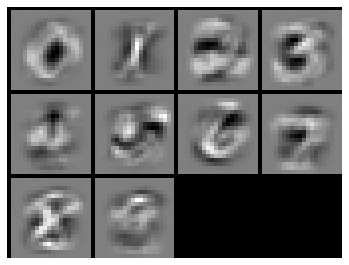

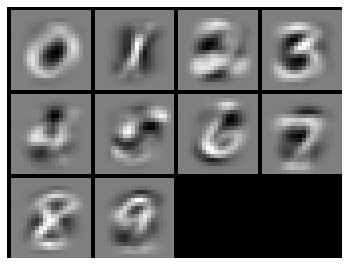

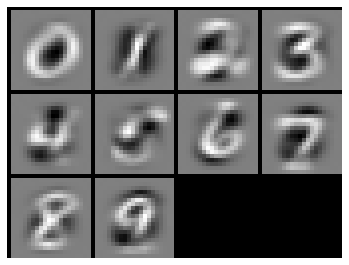

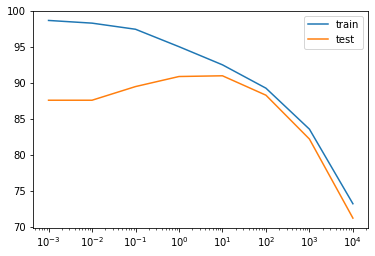

In [8]:
lambda_vals = 10**np.arange(-3., 5.)
num_classes = 10

# Write code here
pred_train_accs, pred_test_accs = [0 for _ in range(len(lambda_vals))], [0 for _ in range(len(lambda_vals))]
for idx, lambda_val in enumerate(lambda_vals):
   weight_vectors, intercepts = train_one_vs_all(X_train, y_train, 10, lambda_val)
   display_data(weight_vectors)

   pred_train = predict_one_vs_all(X_train, weight_vectors, intercepts)
   pred_test  = predict_one_vs_all(X_test,  weight_vectors, intercepts)

   pred_train_accs[idx] = np.mean(pred_train == y_train) * 100
   pred_test_accs[idx] = np.mean(pred_test == y_test) * 100

# In your final plot, use these commands to provide a legend and set 
# the horizontal axis to have a logarithmic scale so the value of lambda 
# appear evenly spaced.

plt.plot(lambda_vals, pred_train_accs, label='train')
plt.plot(lambda_vals, pred_test_accs, label='test')

plt.legend(('train', 'test'))
plt.xscale('log')

## (5 points) Regularization Questions 

1. Does the plot show any evidence of overfitting? If so, for what range of λ values (roughly) is the model overfit? What do the images of the weight vectors look when the model is overfit? 

2. Does the plot show any evidence of underfitting? For what range of λ values (roughly) is the model underfit? What do the images of the weight vectors look like when the model is underfit?

3. If you had to choose one value of λ, what would you select?

4. Would it make sense to run any additional experiments to look for a better value of λ. If so, what values would you try? 

** *Your answers here* **

1. The plot shows evidence of overfitting when λ is between $10^{-3}$ and $10^1$. The images of the weight vectors look very messy and blurry when the model is overfit since it learned the specific images and tried to make the weights too specific to fit all of the images.
2. The plot shows evidence of underfitting when λ is between $10^2$ and $10^4$. The images of the weight vectors look clear and clean when the model is underfit since it learned general patterns of the images and made the weights generalized to fit all of the images.
3. I'd probably select $10^2$ to be my λ since it is in the middleground between underfitting and overfitting the model. The images of its weight vectors are not too clear, indicating that the model doesn't have high bias, and not too blurry, indicating that it doesn't have high variance.
4. It would make sense to run experiments within the range of $10^1$ and $10^{2.5}$. Some potential values to try could include $10^{1.25}$, $10^{1.5}$, $10^{1.75}$, $10^{2.25}$, etc.

## (6 points) Learning Curve

A learning curve shows accuracy on the vertical axis vs. the amount 
of training data used to learn the model on the horizontal axis. To 
produce a learning curve, train a sequence of models using subsets 
of the available training data, starting with only a small fraction 
of the data and increasing the amount until all of the training data
is used. 

Write code below to train models on training sets of increasing size
and then plot both training and test accuracy vs. the amount of training data used.
(This time, you do not need to display the weight vectors as images and you 
will not set the horizontal axis to have log-scale.) 

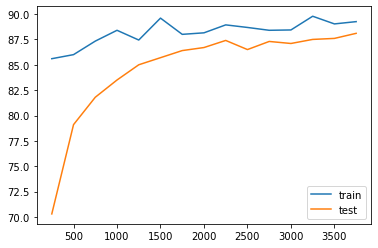

In [12]:
m, n = X_train.shape

train_sizes = np.arange(250, 4000, 250)
nvals = len(train_sizes)

# Example: select a subset of 100 training examples
p = np.random.permutation(m)
selected_examples = p[0:100]
X_train_small = X_train[selected_examples,:]
y_train_small = y_train[selected_examples]

lambda_val = 100

# Write your code here
train_accuracies, test_accuracies = [0 for _ in range(nvals)], [0 for _ in range(nvals)]
for idx in range(nvals):
   p = np.random.permutation(m)
   selected_examples_train = p[0:train_sizes[idx]]

   X_train_small = X_train[selected_examples_train,:]
   y_train_small = y_train[selected_examples_train]

   weight_vectors, intercepts = train_one_vs_all(X_train_small, y_train_small, 10, lambda_val)
   pred_train = predict_one_vs_all(X_train_small, weight_vectors, intercepts)
   pred_test = predict_one_vs_all(X_test, weight_vectors, intercepts)

   train_accuracies[idx] = np.mean(pred_train == y_train_small) * 100
   test_accuracies[idx] = np.mean(pred_test == y_test) * 100

plt.plot(train_sizes, train_accuracies, label='train')
plt.plot(train_sizes, test_accuracies, label='test')

plt.legend(('train', 'test'))

# (4 points) Learning Curve Questions

1. Does the learning curve show evidence that additional training data might improve performance on the test set? Why or why not?

2. Is the any relationship between the amount of training data used and the propensity of the model to overfit? Explain what you can conclude from the plot.

** *Your answers here* **

1. The learning curve shows that additional training data will improve performance on the test set since more training data helps in lowering the generalization error resulting from overfitting. 
2. The less training data used, the more likely the model will be overfitted.